<a href="https://colab.research.google.com/github/goodarzi64/Graph_test/blob/main/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D , Dropout , Flatten , BatchNormalization,LSTM
from tensorflow.keras.optimizers import SGD,Adam
from sklearn.metrics import confusion_matrix
import pandas as pd
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard,EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [56]:
import glob
import os
path = r'/content' # use your path
all_files = glob.glob(os.path.join(path , "/*.csv"))
all_files
from pathlib import Path
root_path = Path(r'/content')
file_paths = root_path.glob('*.csv')
all_files = [root_path.joinpath(file_path) for file_path in file_paths]
li = []
for filename in all_files:
    df1 = pd.read_csv(filename, index_col=None, skiprows=2)
    df1=df1[['Temperature','Cloud Type','Dew Point','Ozone','Relative Humidity','Solar Zenith Angle','Surface Albedo','Pressure','Precipitable Water','Wind Direction','Wind Speed','GHI']]
    li.append(df1)
df = pd.concat(li, axis=0, ignore_index=True)
df.shape

(26280, 12)

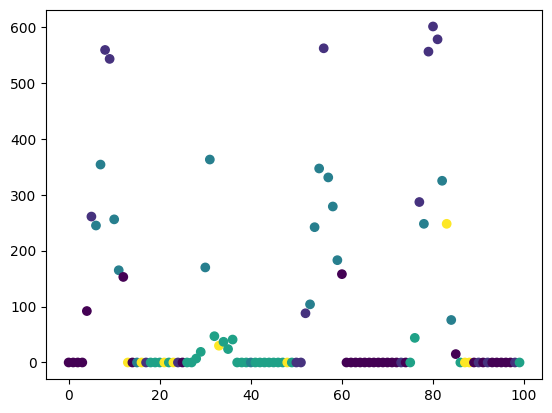

In [25]:
plt.scatter(df.index[:100],df[:100]['GHI'],c=df[:100]['Cloud Type'])

In [29]:
from sklearn.exceptions import FitFailedWarning


scaler=MinMaxScaler(feature_range=(0,1))
df=pd.DataFrame(scaler.fit_transform(df),columns=df.columns)
df.head()


,Temperature,Cloud Type,Dew Point,Ozone,Relative Humidity,Solar Zenith Angle,Surface Albedo,Pressure,Precipitable Water,Wind Direction,Wind Speed,GHI
0,0.234469,0.0,0.483384,0.144509,0.600450,0.747316,0.0,0.600000,0.184211,0.919444,0.047619,0.000000
1,0.226453,0.0,0.489426,0.144509,0.628385,0.669547,0.0,0.566667,0.184211,0.800000,0.047619,0.000000
2,0.214429,0.0,0.489426,0.150289,0.653966,0.593621,0.0,0.566667,0.184211,0.722222,0.066667,0.000000
3,0.220441,0.0,0.483384,0.150289,0.631382,0.520935,0.0,0.600000,0.184211,0.708333,0.076190,0.000000
4,0.268537,0.0,0.480363,0.156069,0.524243,0.452507,0.0,0.600000,0.157895,0.713889,0.095238,0.086874


In [ ]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True,cmap=plt.cm.Blues)

In [49]:
##
def fun(data,lag_in,lag_out):
  k=len(data)-(lag_in+lag_out)+1
  x=[]
  y=[]
  for i in range(k):
    x.append(data[i:i+lag_in,:-1])
    y.append(data[i+lag_in-1:i+lag_in-1+lag_out,[1,-1]])
  x=np.array(x)
  y=np.array(y)
  return x,y
##

In [51]:
##
data=np.array(df)
train=data[:int(0.8*len(data))]
train.shape
test=data[int(0.8*len(data)):]
test.shape
lag_in=48
lag_out=12
x_train,y_train=fun(train,lag_in,lag_out)
x_test,y_test=fun(test,lag_in,lag_out)
##


In [32]:
##
callback=EarlyStopping(min_delta=1e-5,patience=5)
loss_fn=tf.keras.losses.MeanSquaredError()
model=Sequential()
model.add(LSTM(64,return_sequences=True,input_shape=(48,11)))
model.add(Dropout(0.2))
model.add(LSTM(64))
model.add(Dropout(0.2))
model.add(Dense(12,activation="relu"))
model.summary()
##

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 48, 64)            19456     
                                                                 
 dropout (Dropout)           (None, 48, 64)            0         
                                                                 
 lstm_1 (LSTM)               (None, 64)                33024     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense (Dense)               (None, 12)                780       
                                                                 
Total params: 53260 (208.05 KB)
Trainable params: 53260 (208.05 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [54]:
y_train[:,:,-1].shape

(20965, 12)

In [57]:
##
model.compile(optimizer=Adam(learning_rate=0.001),loss=loss_fn)
history=model.fit(x_train,y_train[:,:,-1],batch_size=128,epochs=10,callbacks=[callback],validation_data=(x_test,y_test[:,:,-1]))
##

Epoch 1/10
164/164 [==============================] - 94s 538ms/step - loss: 0.0064 - val_loss: 0.0020
Epoch 2/10
164/164 [==============================] - 39s 236ms/step - loss: 0.0063 - val_loss: 0.0026
Epoch 3/10
164/164 [==============================] - 38s 231ms/step - loss: 0.0063 - val_loss: 0.0019
Epoch 4/10
164/164 [==============================] - 38s 233ms/step - loss: 0.0061 - val_loss: 0.0019
Epoch 5/10
164/164 [==============================] - 34s 210ms/step - loss: 0.0061 - val_loss: 0.0019
Epoch 6/10
164/164 [==============================] - 35s 214ms/step - loss: 0.0060 - val_loss: 0.0021
Epoch 7/10
164/164 [==============================] - 36s 219ms/step - loss: 0.0060 - val_loss: 0.0021
Epoch 8/10
164/164 [==============================] - 36s 221ms/step - loss: 0.0058 - val_loss: 0.0019
Epoch 9/10
164/164 [==============================] - 38s 231ms/step - loss: 0.0057 - val_loss: 0.0023
Epoch 10/10
164/164 [==============================] - 38s 232ms/step - l

In [35]:
def model_plot(history):
    fig = plt.figure(figsize=(5,3))
    plt.plot(history.history['loss'], label='Loss')
    plt.plot(history.history['val_loss'], label='test_Loss')
    plt.xlabel("epoch")
    plt.title('loss Function')
    plt.legend()

In [ ]:
model_plot(history)

In [66]:
y_pred=model.predict(x_test)
print(f"{x_test.shape}{y_test.shape}")
y_test[:100,0,0].shape

(100,)

In [ ]:
fig, axes = plt.subplots(2, 3,sharex=True,figsize=(30, 15))
axes[0,0].plot(y_pred[:100,0],color='blue')
axes[0,0].plot(y_test[:100,0,-1],color='black')
axes[0,0].scatter(np.array(np.arange(100)),y_test[:100,0,0],marker='*',c='y')
axes[0,0].set_title("h1")
axes[0,1].plot(y_pred[:100,1],color='orange')
axes[0,1].plot(y_test[:100,1,-1],color='black')
axes[0,1].set_title("h2")
axes[0,2].plot(y_pred[:100,2],color='green')
axes[0,2].plot(y_test[:100,2,-1],color='black')
axes[0,2].set_title("h3")
axes[1,0].plot(y_pred[:100,3],color='red')
axes[1,0].plot(y_test[:100,3,-1],color='black')
axes[1,0].set_title("h4")
axes[1,1].plot(y_pred[:100,4],color='cyan')
axes[1,1].plot(y_test[:100,4,-1],color='black')
axes[1,1].set_title("h5")
axes[1,2].plot(y_pred[:100,5],color='blue')
axes[1,2].plot(y_test[:100,5,-1],color='black')
axes[1,2].set_title("h6")
plt.legend()

In [ ]:
y_pred

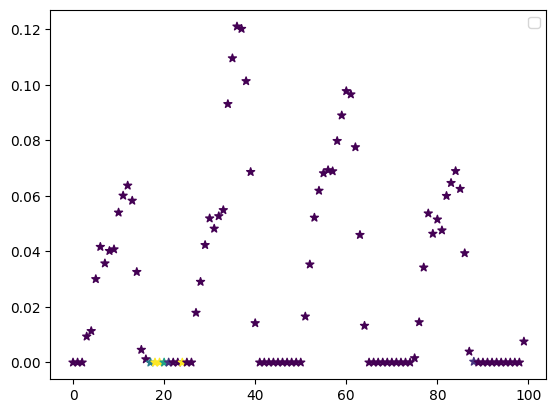

In [105]:
a=np.array([abs(y_test[:100,0,-1]-y_pred[:100,0])])
plt.scatter(np.array(np.arange(100)),a,marker='*',c=y_test[:100,0,0])
plt.legend()


In [86]:
for i in range(7):
  MAE = mean_absolute_error(y_test[:,i,-1],y_pred[:,i])
  RMSE = np.sqrt(mean_squared_error(y_test[:,i,-1],y_pred[:,i]))
  R2 = r2_score(y_test[:,i,-1],y_pred[:,i])
  print('MAE{} : '.format(i+1),MAE)
  print('RMSE{} : '.format(i+1),RMSE)
  print('R2{} : '.format(i+1),R2)
  print('\n')

MAE1 :  0.022290137977643794
RMSE1 :  0.04086350446562877
R21 :  0.9826724732023793


MAE2 :  0.022045179934408042
RMSE2 :  0.041981672979012265
R22 :  0.9817095256918219


MAE3 :  0.022063550935697666
RMSE3 :  0.0428645746023789
R23 :  0.980932115123292


MAE4 :  0.02333807670642483
RMSE4 :  0.04508061400294331
R24 :  0.9789095847726648


MAE5 :  0.023819011855283973
RMSE5 :  0.04639741173973834
R25 :  0.9776615126854618


MAE6 :  0.024310687662896374
RMSE6 :  0.0475225170463278
R26 :  0.9765669839190856


MAE7 :  0.025789787924425198
RMSE7 :  0.049454264671180734
R27 :  0.9746210426829901


